### Some Analysis of the NOAA weather dataset ###

In this notebook we are analyzing a sample out of data that was downloaded from http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/, the main file is ghcnd_all.tar.gz which is about 2.4 GB which becomes around 20GB when uncompressed.

The data contains about 1 million station-year recordings. That is too much to analyzer on single core machine, so we start by taking a sample of 20,000 recordings of the maximal daily temperatures for a period of a 365 days starting on January 1st (the last day of leap years is discarded).

### Checking the versions of some important packages ###

In [2]:
%pylab inline
import pandas as pd
import numpy as np
import sklearn as sk
print 'pandas version: ',pd.__version__,'should be at least 0.14.0'
print 'numpy version:',np.__version__,'should be at least 1.8.1'
print 'sklearn version:',sk.__version__,'should be at least 0.14.1'

Populating the interactive namespace from numpy and matplotlib
pandas version:  0.16.2 should be at least 0.14.0
numpy version: 1.10.1 should be at least 1.8.1
sklearn version: 0.16.1 should be at least 0.14.1


Switch to the data directory and check it's contents

In [3]:
%cd ../data/weather/
#%cs ~/data/weather
!ls -lh

/Users/mgalarny/Desktop/DSE200-notebooks/data/weather
total 159696
-rw-r--r--  1 mgalarny  staff   839K Oct 30 09:08 ALL.corrupted.csv
-rw-r--r--  1 mgalarny  staff   839K Oct 30 09:08 ALL.head.csv
-rw-r--r--  1 mgalarny  staff    25M Oct 30 09:08 SAMPLE_TMAX.csv
-rw-r--r--  1 mgalarny  staff    13K Oct 30 09:08 TMAX.10.csv
-rw-r--r--  1 mgalarny  staff     0B Oct 30 09:08 TMAX.head.csv
-rw-r--r--  1 mgalarny  staff   218B Oct 30 09:08 data-source.txt
-rw-r--r--  1 mgalarny  staff    22K Oct 30 09:08 ghcnd-readme.txt
-rw-r--r--  1 mgalarny  staff   7.0M Oct 30 09:08 ghcnd-stations.txt
-rw-r--r--  1 mgalarny  staff   7.4M Nov  9 17:20 ghcnd-stations_buffered.txt
-rw-r--r--  1 mgalarny  staff   270B Oct 30 09:08 ghcnd-version.txt
-rw-r--r--  1 mgalarny  staff    37M Oct 30 09:08 make_covar.raw_256


In [4]:
!cat data-source.txt

I got the data from this ftp site:

ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/

Opening the ftp site in a browser is helpful: you can easily browse the directory structure and look at txt and
pdf files.

Yoav Freund


- *data-source.txt* - information about downloading the data from NOAA
- *ghcnd-readme.txt* - A readme file describing the content of all of the files from ghcnd, in particular:
- *ghcnd-stations.txt* - information about each of the meteorological stations.
- *Sample_TMAX_By_Year* - a file with 10,000 randomly selected one-year-long TMAX measurements

In [5]:
!head -1 SAMPLE_TMAX.csv
# a Typical single line in the data file

USC00507570,TMAX,2005,67,44,61,17,-17,-22,-39,-44,-44,-78,-156,-156,-33,28,39,22,-89,-139,-156,44,61,50,-39,17,67,61,-61,-61,11,33,-72,-100,-150,-178,-150,-33,39,28,22,11,-150,-156,-150,50,44,28,39,50,56,39,67,50,39,56,50,56,44,22,6,17,17,61,83,67,67,89,78,61,61,83,56,44,67,89,67,89,100,83,56,17,22,50,39,28,-6,28,-6,-28,-50,-44,-33,-22,-22,-22,17,67,67,78,94,89,72,56,89,111,94,83,56,11,28,56,89,133,133,128,178,167,194,211,189,178,161,172,144,133,128,117,183,200,211,211,178,172,133,150,128,133,150,150,178,211,200,133,172,144,161,156,139,150,133,144,161,150,161,200,183,228,222,183,144,150,178,167,183,239,239,267,244,222,222,117,189,233,194,206,261,228,211,222,261,228,228,200,194,183,233,244,217,267,250,217,161,200,200,194,250,261,222,194,183,161,206,228,228,222,206,200,167,183,194,172,200,189,167,183,194,200,206,217,206,244,267,256,278,294,278,256,228,228,189,206,211,211,161,156,144,156,161,156,167,139,122,144,139,156,150,144,128,144,128,150,150,133,144,172,156,106,161,161,122,122,133,11

### read data into a Pandas Dataframe ##
* Read the data into a DataFrame
* Read the data vectors in G
* Divide by 10.0 to get the temperatude in degrees celsius
* Replace values outside the range [-400,500]  ([-40,50] degrees celsius) with nan  
* Paste fixed matrix back into Dout
* Show the first few lines of DDout

In [6]:
header=['station','measurement','year']+range(1,366)
# D=pandas.DataFrame(columns=header)
Data = pd.read_csv('SAMPLE_TMAX.csv',header=None,names=header)
G=Data.ix[:,3:369]
G[G<-400]=np.nan   #remove outliers
G[G>500]=np.nan
G=G/10   # temp / 10 is the temp in celsius
Data.ix[:,3:369]=G
G=G.transpose()
Data.head()

,station,measurement,year,1,2,3,4,5,6,7,...,356,357,358,359,360,361,362,363,364,365
0,USC00507570,TMAX,2005,6.7,4.4,6.1,1.7,-1.7,-2.2,-3.9,...,-3.9,-3.3,-1.7,3.9,6.1,5.0,6.1,6.1,4.4,6.1
1,NOE00135018,TMAX,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,3.1,4.5,4.2,3.2,1.6,2.0,2.2,3.9,6.1
2,KZ000036546,TMAX,1982,NaN,NaN,-13.9,NaN,NaN,-4.5,NaN,...,NaN,-7.3,NaN,NaN,NaN,-17.0,-16.6,-16.0,-13.5,-9.9
3,USC00054664,TMAX,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.4,7.8,3.3,NaN,NaN,3.9,5.6,-3.9,-15.0,-15.0
4,CUW00011706,TMAX,1981,30.0,28.3,30.0,30.0,28.3,28.9,28.9,...,30.0,31.1,32.2,31.1,31.1,32.2,32.2,31.1,31.1,31.1


(7300000,) <class 'pandas.core.series.Series'>
-40.0 50.0


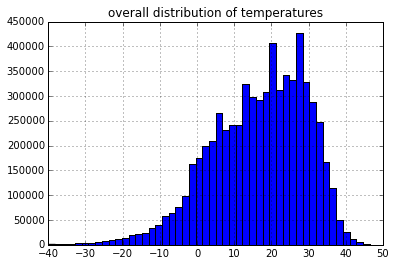

In [7]:
tmp=G.ix[:,:].unstack()
print tmp.shape, type(tmp)
tmp.hist(bins=50);
title('overall distribution of temperatures')
print tmp.min(),tmp.max()

### Script for plotting yearly plots ###

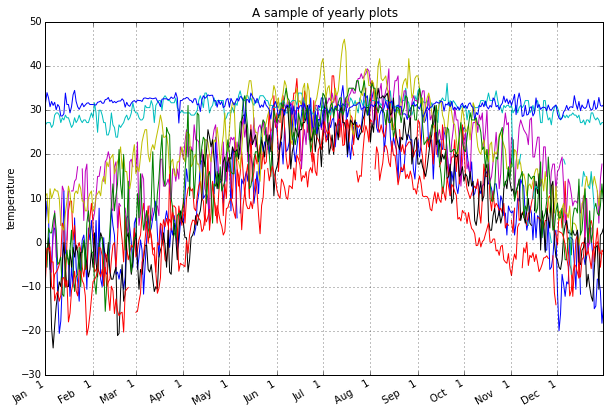

In [8]:
from datetime import date
dates=[date.fromordinal(i) for i in range(1,366)]
def YearlyPlots(T,ttl='',size=(10,7)):
    fig=plt.figure(1,figsize=size,dpi=300)
    #fig, ax = plt.subplots(1)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot(dates,T);
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    ylabel('temperature')
    grid()
    title(ttl)
YearlyPlots(Data.ix[20:30,3:].transpose(),ttl='A sample of yearly plots')

### Plots for sydney, Australia ###

['ASN00066124' 'ASN00066059' 'ASN00066194' 'ASN00066131' 'ASN00066195'
 'ASN00066062']


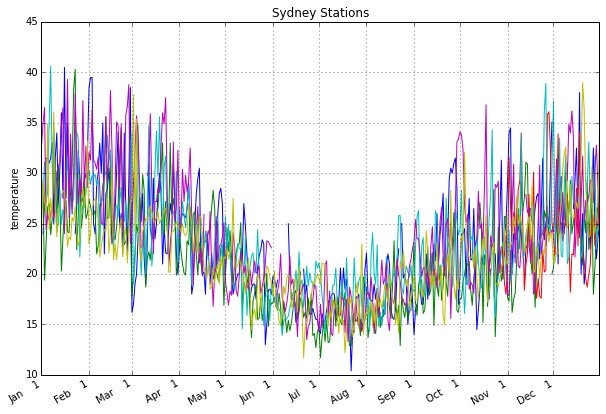

In [9]:
sydneyStations=['ASN00066' in station for station in Data['station']]
print Data[sydneyStations]['station'].values
#for station in sydneyStations:
#    print station,sum(Data['station']==station)
tmp=Data[sydneyStations].transpose()
YearlyPlots(tmp.ix[3:,:],ttl='Sydney Stations')
#tmp.ix[:,tmp.columns[7]]
#Data[sydneyStations][['station','year']]

### Computing mean and std for each station/year ###
And calculating the standard deviation. In this case we are not divi

In [10]:
# a simple scale function to normalize the data-frame row-by-row
from numpy import mean, std
def scale_temps(Din):
    matrix=Din.iloc[:,3:]
    Dout=Din.loc[:,['station','year']+range(1,366)]
    Mean=mean(matrix, axis=1).values
    Dout['Mean']=Mean
    Std= std(matrix, axis=1).values
    Dout['Std']=Std
    # Decided not to normalize each year to have mean zero and std 1
    # tmp = pd.DataFrame((matrix.values - Mean[:,np.newaxis])/Std[:,newaxis],columns=range(1,366))
    # print tmp.head()
    Dout.loc[:,3:368]=matrix.values
    return Dout
Dout=scale_temps(Data)
#reorder the columns
Dout=Dout[['station','year','Mean','Std']+range(1,366)]
Dout.head()

,station,year,Mean,Std,1,2,3,4,5,6,...,356,357,358,359,360,361,362,363,364,365
0,USC00507570,2005,6.1,10.439819,6.7,6.7,4.4,6.1,1.7,-1.7,...,-2.8,-3.9,-3.3,-1.7,3.9,6.1,5.0,6.1,6.1,4.4
1,NOE00135018,1959,6.1,7.974400,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,5.8,3.1,4.5,4.2,3.2,1.6,2.0,2.2,3.9
2,KZ000036546,1982,-9.9,14.897310,NaN,NaN,NaN,-13.9,NaN,NaN,...,NaN,NaN,-7.3,NaN,NaN,NaN,-17.0,-16.6,-16.0,-13.5
3,USC00054664,1964,-15.0,10.790115,NaN,NaN,NaN,NaN,NaN,NaN,...,6.7,9.4,7.8,3.3,NaN,NaN,3.9,5.6,-3.9,-15.0
4,CUW00011706,1981,31.1,1.588618,30.0,30.0,28.3,30.0,30.0,28.3,...,28.9,30.0,31.1,32.2,31.1,31.1,32.2,32.2,31.1,31.1


### Compute average temperature for each day of the year. ###

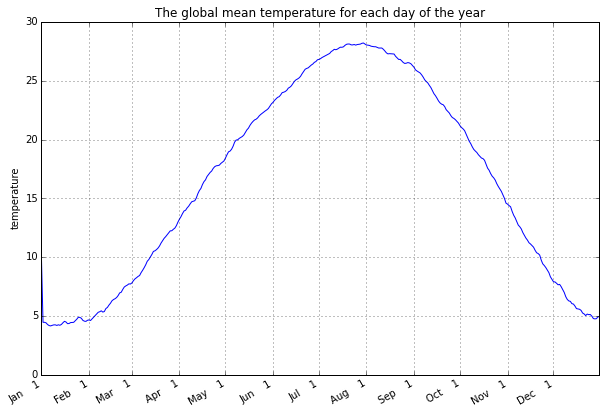

In [11]:
Mean=mean(Dout.ix[:,3:368], axis=0)
YearlyPlots(Mean,ttl='The global mean temperature for each day of the year')


##Principle Component Analysis##
An explanation of the principle component analysis (PCA) can be found
in [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis).
The site [setosa.io](http://setosa.io/ev/principal-component-analysis/) contains a nice interactive visualization of PCA.

In this section we use PCA to model the main ways in which temperarature along the year varies between stations.   We start by cleaning the data.

### Missing Values ###
We find the distribution of missing values and decide how to deal with them. From the analysis below we see that most rows have some
missing values. We therefor choose to perform the average more carefully, rather than discard rows with many missing values

3778

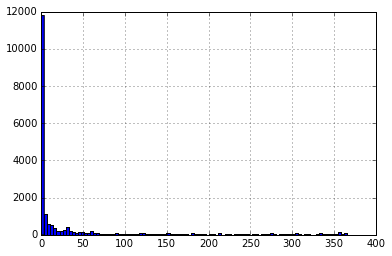

In [12]:
nan_per_row=sum(isnan(Dout.ix[:,3:368]),axis=1)
nan_per_row.hist(bins=100)
sum(nan_per_row>50)

### NaN-tolerant averaging  ###
We compute the empirical covariance matrix in a way that tolerates NaN values.

<span style="color:red"> In the code below I remove all rows that have a nan in them. If you remve the command **M.dropna(...** then all rows are used. Can you get better results without removing the rows? </span>

In [13]:
# demonstrating the use of the cell magic %%time, which measures the run-time of the cell.
M=Dout.ix[:,3:368] # ix columns # loc is location i think
M=M.dropna(axis=0)
(columns,rows)=shape(M)
Mean=mean(M, axis=0).values

print (columns,rows), shape(Mean)
C=np.zeros([columns,columns])   # Sum
N=np.zeros([columns,columns])   # Counter of non-nan entries
print shape(M)

(8914, 365) (365,)
(8914, 365)


In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(M)


PCA(copy=True, n_components=None, whiten=False)

In [15]:
shape(pca.components_)

(365, 365)

### Percentage of variance Explained ###

[ 0.61416594  0.1095232   0.01190743  0.00949993  0.00692119  0.00645285
  0.00603425  0.00570838  0.00503781  0.00491996]


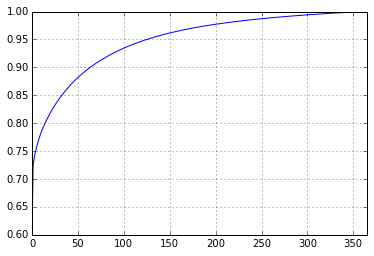

In [16]:
cumulative_explained = cumsum(pca.explained_variance_ratio_) 
plot(cumulative_explained);
xlim([0,365])
grid()

print pca.explained_variance_ratio_[:10]


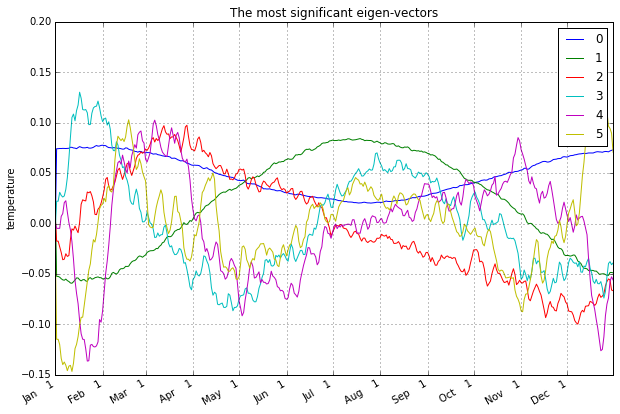

In [17]:
k=6 # number of components to show.
Tcomp=np.transpose(pca.components_)
YearlyPlots(Tcomp[:,:k],ttl='The most significant eigen-vectors')
legend(range(0,k));

In [18]:
k=50
Eig=np.matrix(Tcomp[:,:k])
#print [np.linalg.norm(U[:,i]) for i in range(k)]
matrix=np.matrix(Dout.ix[:,3:368])-Mean
matrix[isnan(matrix)]=0
print shape(Eig),shape(matrix)
Prod=matrix*Eig;
print shape(Prod)

(365, 50) (20000, 365)
(20000, 50)


Insert coefficients for k top eigenvectors into the dataframe **Dout**

In [19]:
for i in range(k-1,-1,-1):
    Ser=pd.Series(np.array(Prod)[:,i],index=Dout.index)
    Dout.insert(4,'V'+str(i),Ser)
Dout.head()

,station,year,Mean,Std,V0,V1,V2,V3,V4,V5,...,356,357,358,359,360,361,362,363,364,365
0,USC00507570,2005,6.1,10.439819,-142.921389,-52.671361,35.580630,0.966396,-22.470045,26.487595,...,-2.8,-3.9,-3.3,-1.7,3.9,6.1,5.0,6.1,6.1,4.4
1,NOE00135018,1959,6.1,7.974400,-57.808806,-51.134065,21.558851,19.569253,2.113129,4.606745,...,8.0,5.8,3.1,4.5,4.2,3.2,1.6,2.0,2.2,3.9
2,KZ000036546,1982,-9.9,14.897310,-54.319386,26.059085,5.495803,-4.901814,0.289469,-8.192348,...,NaN,NaN,-7.3,NaN,NaN,NaN,-17.0,-16.6,-16.0,-13.5
3,USC00054664,1964,-15.0,10.790115,-20.740335,9.417209,21.434897,20.397891,5.485667,-4.093667,...,6.7,9.4,7.8,3.3,NaN,NaN,3.9,5.6,-3.9,-15.0
4,CUW00011706,1981,31.1,1.588618,313.486286,-24.877401,-9.005882,-5.761675,-4.652758,5.149585,...,28.9,30.0,31.1,32.2,31.1,31.1,32.2,32.2,31.1,31.1


### Longitude,Latitude information ###
Loading the station longitude/latitude and merging it into the Table

In [20]:
!ls

ALL.corrupted.csv           ghcnd-readme.txt
ALL.head.csv                ghcnd-stations.txt
SAMPLE_TMAX.csv             ghcnd-stations_buffered.txt
TMAX.10.csv                 ghcnd-version.txt
TMAX.head.csv               make_covar.raw_256
data-source.txt


In [21]:
!cat ghcnd-readme.txt   # uncomment to read the readme file.

README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) 
Version 3.00

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

I. DOWNLOAD QUICK START

Start by downloading "ghcnd-stations.txt," which has metadata for all stations.

Then download one of the following TAR files:

  - "ghcnd-all.tar.gz" if you want all of GHCN-Daily, OR
  - "ghcnd-gsn.tar.gz" if you only want the GCOS Surface Network (GSN), OR
  - "ghcnd-hcn.tar.gz" if you only want the U.S. Historical Climatology Network 
    (U.S. HCN).

Then uncompress and untar the contents of the tar file, 
e.g., by using the following Linux command:

tar xzvf ghcnd_xxx.tar.gz

Where "xxx" stands for "all", "hcn", or "gsn" as applicable. The files will be 
extracted into a subdirectory under the directory where the command is issued.

ALTERNATIVELY, if you only need data for one station:

  - Find the station's

In [22]:
# Make all lines be of length 90 to solve problem wilth read_fwf
out=open('ghcnd-stations_buffered.txt','w')
for line in open('ghcnd-stations.txt','r').readlines():
    line=line.rstrip()
    string=line+' '*(90-len(line))+'\n'
    out.write(string)
out.close()

In [23]:
colspecs = [(0, 11), (11, 21), (21, 31), (31, 38),(38,41),(41,72),(72,76),(76,80),(80,86)]
stations = pd.read_fwf('ghcnd-stations_buffered.txt', colspecs=colspecs, header=None, index_col=0,
                       names=['latitude','longitude','elevation','state','name','GSNFLAG','HCNFLAG','WMOID'])

In [24]:
#stations['elevation'][stations['elevation']==-999.9]=0  # decided not to remove -999.9 because this confuses hist

In [30]:
stations.head()
stations
stations['latitude']
stations['longitude']
stations['elevation']

ACW00011604      10.1
ACW00011647      19.2
AE000041196      34.0
AF000040930    3366.0
AG000060390      24.0
AG000060590     397.0
AG000060611     561.0
AG000060680    1362.0
AGE00135039      50.0
AJ000037575     490.0
AJ000037579    1746.0
AJ000037605     440.0
AJ000037636     404.0
AJ000037639     333.0
AJ000037656     403.0
AJ000037661     641.0
AJ000037668     583.0
AJ000037673      27.0
AJ000037674     999.0
AJ000037675     552.0
AJ000037679     -26.0
AJ000037729    1476.0
AJ000037734     404.0
AJ000037735     311.0
AJ000037740     682.0
AJ000037742     313.0
AJ000037744      94.0
AJ000037747      15.0
AJ000037749      95.0
AJ000037753    1082.0
                ...  
ZA000067571    1384.0
ZA000067581    1032.0
ZA000067583    1143.0
ZA000067633    1053.0
ZA000067641    1213.0
ZA000067659     978.0
ZA000067667    1213.0
ZA000067741     951.0
ZA000067743     986.0
ZA000067753    1278.0
ZI000067755     617.0
ZI000067761     518.0
ZI000067765    1344.0
ZI000067775    1480.0
ZI00006777

### perform a **JOIN** ###
Join the geographical information into **Dout**, creating a new dataframe called **Djoined**

In [ ]:
#type(stations[stations['state'] == 'IL'].index.unique())
#df = pd.DataFrame(stations[stations['state'] == state_list[2]].index.unique())
#print df
   
   

Djoined=Dout.join(stations,on='station')
#state_list = Djoined['state'].unique()
print state_list[state_list!='nan']
Djoined.ix[:,3:368]
Mean=mean(Dout.ix[:,3:368], axis=0)
YearlyPlots(Mean,ttl='The global mean temperature for each day of the year')
#Mean=mean(Dout.ix[:,3:368], axis=0)
#YearlyPlots(Mean,ttl='The global mean temperature for each day of the year')
"""
print type(state_list)
for state in range(len(state_list)):
    lama = pd.DataFrame(stations[stations['state'] == state_list[state]].index.unique()).values.tolist()
    print state_list[state]
    print lama
"""

In [ ]:
Djoined.columns[-10:]

In [ ]:
Djoined['AbsLatitude']=abs(Djoined['latitude'].values)

In [ ]:
Djoined.ix[:5,['station',u'longitude','latitude',u'AbsLatitude','Mean','Std','V0','V1','V2']]

### Looking for significant correlations and dependencies ###

In [ ]:
Djoined[['latitude','elevation','Mean','Std','V0','V1','V2','V3','V4','V5']].cov()

<span style="color:red"> The correlations between different $V_i$ components should be zero, which it isn't.
Is this due to numerical roundoff errors? Are the correlations statistically significant for this sample size? </span>

In [ ]:
Djoined[['latitude','elevation','Mean','Std','V0','V1','V2','V3','V4','V5']].corr()

In [ ]:
# Choosing significance threshold so that none of the correlations between the Vi-s are significant.
abs(Djoined[['latitude','elevation','Mean','Std','V0','V1','V2','V3','V4','V5']].corr())>0.2

In [ ]:
# Seems to take enormous amount of time
from pandas.tools.plotting import scatter_matrix
df = Djoined.ix[:,['latitude','elevation','Mean','Std','V0','V1','V2','V3','V4','V5']]
scatter_matrix(df, alpha=0.03, figsize=(20, 20), diagonal='kde');

In [ ]:
X='latitude'
Djoined.ix[:,X].hist(bins=100);

In [ ]:
X='latitude';Y='Mean'
scatter(Djoined.loc[:,X],Djoined.loc[:,Y],alpha=0.05)
xlabel(X)
ylabel(Y)

In [ ]:
#checking for an anomaly in the elevations of stations
Djoined[['station','elevation']][Djoined['elevation']<-500].head()

In [ ]:
!grep ASN00010865 ghcnd-stations.txt

### Plotting maps ###
Working through http://matplotlib.org/basemap/

* http://en.wikipedia.org/wiki/Map_projection
* http://matplotlib.org/basemap/users/mapsetup.html

In [ ]:
lons=stations.ix[:,'longitude'].values
lats=stations.ix[:,'latitude'].values
station_names=stations.index.values
ll=len(lons)
lonmin=-180;lonmax=180;latsmin=-80;latsmax=80;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax)
print sum(select)
station_names=station_names[select]
lons=lons[select]
lats=lats[select]
print len(lons),len(lats),len(station_names)

In [ ]:
# http://matplotlib.org/basemap/users/merc.html

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'i' means use intermediate resolution coastlines.
plt.figure(figsize=(15,10),dpi=300)
m = Basemap(projection='merc',llcrnrlat=latsmin,urcrnrlat=latsmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')

# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

# draw map with markers for locations
x, y = m(lons,lats)
m.plot(x,y,'g.')

plt.title('weather stations')
plt.show()


To get to these coordinate on Google Maps, type the latitude and longitude in decimal in the search box or use:
https://www.google.com/maps/place/72%C2%B018'00.0%22S+170%C2%B013'00.1%22E/@-72.3,170.216694,17z/data=!3m1!4b1!4m2!3m1!1s0x0:0x0

<span style="color:red">HW questions</span>

1. Waiting for somebody to write a script that will do that automatically from python
2. Can you create a map where the denity of points is represented as a density map (topographical map)?
3. Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? What conclusions can you draw from this map?


### Reconstruction ###

In [ ]:
# Sachin, this function crashes, can you find out why and fix it?
# It ran fine last year.
%matplotlib inline
def plot_reconstructions(selection,rows=2,columns=7):
    Recon=Eig*Prod.transpose()+Mean[:,np.newaxis]
    plt.figure(figsize=(columns*3,rows*3),dpi=300)
    j=0;
    for i in selection:
        subplot(rows,columns,j); 
        j += 1; 
        if j>=rows*columns: break
        print i,j,shape(Recon)
        plot(Recon[:,i])
        plot(Djoined.ix[i,1:365]);
        title(Djoined.ix[i,'station']+' / '+str(Djoined.ix[i,'year']))
        xlim([0,365])

Observe in the reconstructions below that the bloue line fills in (extrapolation/interpolation) the places where the measurements are not available. It also reduces the fluctuations in the relative to the original line. Recall the we are using the k top eigenvectors which explain about 88% of the variance.

In [ ]:
plot_reconstructions(range(50,51),rows=7,columns=3)

<span style="color:red"> Check how the approximations change/improve as you increase the number of coefficients</span>

In [ ]:
hist(Djoined.ix[:,'V0'],bins=100);

In [ ]:
selection= [i for i in range(shape(Djoined)[0]) if Djoined.ix[i,'latitude']<-10]
plot_reconstructions(selection,rows=7,columns=3)
shape(selection)

<span style="color:red">Can you reduce the reconstruction error (using a fixed number of eigenvectors) by splitting the stations according to region (for example country, state, latitudal range). Note that having a regions with very few readings defeats the purpose.

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()